# SALARY PREDICTION FROM EMAIL NETWORK

**Note: networxk=1.11**

## INTRODUCTION

In this data science project I combine **network analysis** and **supervised machine learning** to predict given an email network of a company, what employees are receiving a management position salary.

**The email network of the company can be represented as a graph** and it is defined as follows:
* Each node corresponds to a person at the company.
* Each edge indicates that at least one email has been sent between two people.
* The network contains the node attributes *Department* and *ManagementSalary*.
* *Department* indicates the department in the company which the person belongs to, and *ManagementSalary* indicates whether that person is receiving a management position salary (1) or if not (0).

The problem we face is that there are missing values for the attribute *ManagementSalary*. **Our goal will be to predict these values.**

The steps we are going to follow are:

1. Get the data.
2. Explore the data.
3. Prepare de data.
4. Feature selection.
5. Short-List Promissing Models.
6. Fine-Tune the system.
7. Reach a conclusion.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
sns.set()
%matplotlib inline

## 1. GETTING THE DATA

The first step is to analyse the network in order to get more information about the company.

We have all the information in a networkx graph. NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

In [2]:
file = 'data/email_prediction.txt'
G = nx.read_gpickle(file)
G

## 2. EXPLORING THE DATA

If we try to draw the graph we can see it's very messy, you can hardly see anything. Each blue dot represents a node and therefore an employee, and an edge between two nodes means that those employees have been in contact through email.

/media/agm/D228FA0328F9E67F/github_repos/email_network/conda_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/media/agm/D228FA0328F9E67F/github_repos/email_network/conda_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/media/agm/D228FA0328F9E67F/github_repos/email_network/conda_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/media/agm/D228FA0328F9E67F/github_repos/email_network/conda_env/lib/python3.7/site-packages/networkx/drawing/nx_py

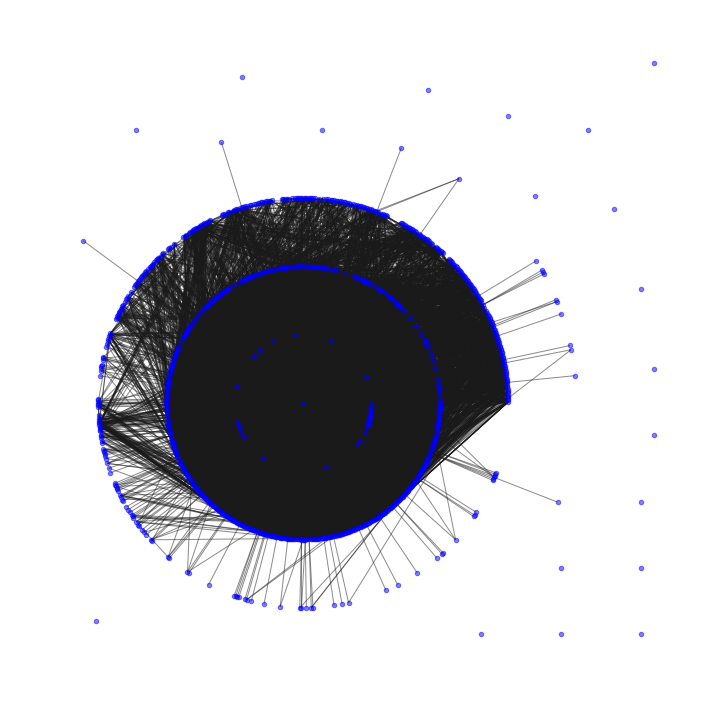

In [3]:
pos = graphviz_layout(G, prog='twopi')

fig, ax = plt.subplots(1, 1, figsize = (10,10))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis('equal')
plt.tight_layout()

Let's see if we can extract some information from the graph:

- How many employees have used the email in the company?
- How many employees in the company have been in contact through email?

Answer those questions is as easy as get the number of nodes and the number of edges of the graph.

In [4]:
print('{} employees have used the email and {} employees have been in contact.'.format(len(G.nodes()),len(G.edges())))

1005 employees have used the email and 16706 employees have been in contact.


In [5]:
avg_contact = len(G.edges())/len(G.nodes())
print('We can deduce from that information, that on average, each employee have been in contact with {:.1f} coworkers.'.format(avg_contact))

We can deduce from that information, that on average, each employee have been in contact with 16.6 coworkers.


We can also convert the graph to a pandas dataframe. The row and column index is the number of employee and the dataframe entries are equal to 1 if exist a connection between the employee i and the employe j and equal to 0 otherwise. Therefore the dataframe is symmetrical.

In [6]:
nx.to_pandas_dataframe(G)

,0,1,2,3,4,5,6,7,8,9,...,995,996,997,998,999,1000,1001,1002,1003,1004
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The graph has more information. Each node has two attributes, the department where they work and if they are receiving a management salary or not.

In [7]:
G.nodes(data = True)[:10]

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (2, {'Department': 21, 'ManagementSalary': nan}),
 (3, {'Department': 21, 'ManagementSalary': 1.0}),
 (4, {'Department': 21, 'ManagementSalary': 1.0}),
 (5, {'Department': 25, 'ManagementSalary': nan}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (7, {'Department': 14, 'ManagementSalary': 0.0}),
 (8, {'Department': 14, 'ManagementSalary': nan}),
 (9, {'Department': 14, 'ManagementSalary': 0.0})]

We see how there are employees with missing values in the attribute *Management Salary*. **Remember our is goal is to predict those nan values.**

Now we store that information in a data frame, where each column is an attribute and the index is the number of the employee:

In [8]:
df = pd.DataFrame(index = G.nodes())
df['department'] = pd.Series(nx.get_node_attributes(G,'Department'))
df['management_salary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
df.head()

,department,management_salary
0,1,0.0
1,1,NaN
2,21,NaN
3,21,1.0
4,21,1.0


We check for nan values:

In [9]:
df.isna().sum()

department             0
management_salary    252
dtype: int64

Now we are able to answer more questions:

* How many departments does the company have?
* Which is the department with the most employees?

In [10]:
print('The company has {} departments and the department with most employees is number {} with {} employees.'
      .format(df['department'].nunique(), df['department'].value_counts().idxmax(), df['department'].value_counts().iloc[0]))

The company has 42 departments and the department with most employees is number 4 with 109 employees.


* What are the departments with the most employees ?

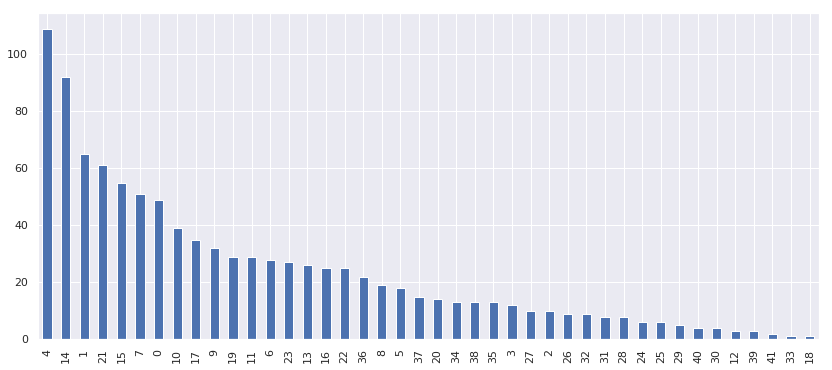

In [11]:
df['department'].value_counts().plot(kind='bar', figsize=(14,6))
plt.show()

* What are the 5 departments with the most employees receiving a management salary?

In [12]:
df.groupby('department').management_salary.sum().sort_values(ascending=False).head(5)

department
4     14.0
10    13.0
21    10.0
36     9.0
15     7.0
Name: management_salary, dtype: float64

### 2.1 DEFINING THE STRATEGY

Once we already know more about the company, we can focus on the goal of predict which employees are receiving a management position salary. In order to achieve it we will make the following realistic assumption:

**'*An employee with a management position salary is going to be somebody whose 'importance' in the network is higher than somebody who doesn't have that management position salary.*'**

We can suspect the assumption is realistic, because usually somebody with a magement position in a company is in charge of other employees and therefore sends or receive more emails. In addition she/he is in contact with other departments.

Actually, there are different ways to evaluate the importance of a node in a network, we will take into consideration the following ones with their definitions:
* **Degree**. Important nodes have many connections.
* **Closeness**. Important nodes are close to other nodes.
* **Betweenness**. Important node connect other nodes. 
* **Page Rank**. Important nodes are those with many in-links from important pages (developed by Google founders).
* **Clustering**. Important nodes have a higher fraction of pairs of the node's friends that are friends with each other.

We compute those values for all the employees (nodes) of the network (graph) and we add it to the previous dataframe:

In [13]:
df['degree'] = pd.Series(nx.degree_centrality(G))
df['closeness'] = pd.Series(nx.closeness_centrality(G, normalized = True))
df['betweenness'] = pd.Series(nx.betweenness_centrality(G, normalized = True, endpoints = False))
df['page_rank'] = pd.Series(nx.pagerank(G, alpha = 0.8))
df['clustering'] = pd.Series(nx.clustering(G))
df.head()

,department,management_salary,degree,closeness,betweenness,page_rank,clustering
0,1,0.0,0.043825,0.421991,0.001124,0.001202,0.276423
1,1,NaN,0.051793,0.422360,0.001195,0.001395,0.265306
2,21,NaN,0.094622,0.461490,0.006570,0.002531,0.297803
3,21,1.0,0.070717,0.441663,0.001654,0.001759,0.384910
4,21,1.0,0.095618,0.462152,0.005547,0.002424,0.318691


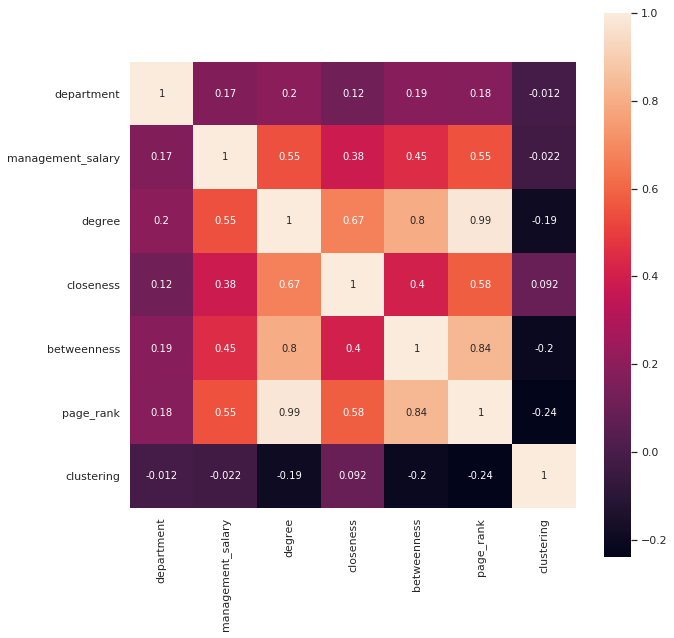

In [20]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, annot=True, ax=ax)
plt.show()

## 3. PREPARING THE DATA

In this section we prepare the data so that we can train a machine learning model.

In **df_data** we store the data we are going to use to train and test the model and in **df_predict** we store the employees we have to predict their attribute *ManagementSalary*. (We can see how the column *management_salary* in df_predict have all nan).

In [35]:
df_data = df[~ np.isnan(df.management_salary)]
df_predict = df[np.isnan(df.management_salary)]
display(df_data.head())
display(df_predict.head())

,department,management_salary,degree,closeness,betweenness,page_rank,clustering
0,1,0.0,0.043825,0.421991,0.001124,0.001202,0.276423
3,21,1.0,0.070717,0.441663,0.001654,0.001759,0.384910
4,21,1.0,0.095618,0.462152,0.005547,0.002424,0.318691
6,25,1.0,0.114542,0.475805,0.012387,0.003045,0.155183
7,14,0.0,0.071713,0.420156,0.002818,0.001948,0.287785


,department,management_salary,degree,closeness,betweenness,page_rank,clustering
1,1,NaN,0.051793,0.422360,0.001195,0.001395,0.265306
2,21,NaN,0.094622,0.461490,0.006570,0.002531,0.297803
5,25,NaN,0.170319,0.501484,0.030995,0.004802,0.107002
8,14,NaN,0.036853,0.413151,0.000557,0.001048,0.447059
14,4,NaN,0.079681,0.442068,0.003726,0.002091,0.215784


We divide **df_data** in **X_train_test** (features) and **y_train_test** (target value) and drop the attribute *management_salary* from **df_predict**:

In [36]:
X_train_test = df_data.drop(columns = ['management_salary']) # features of each data instance
y_train_test = df_data.management_salary # target value for each data instance (sample)
X_predict = df_predict.drop(columns = ['management_salary'])
display(X_train_test.head(5))
display(y_train_test.head(5))
display(X_predict.head(5))

,department,degree,closeness,betweenness,page_rank,clustering
0,1,0.043825,0.421991,0.001124,0.001202,0.276423
3,21,0.070717,0.441663,0.001654,0.001759,0.384910
4,21,0.095618,0.462152,0.005547,0.002424,0.318691
6,25,0.114542,0.475805,0.012387,0.003045,0.155183
7,14,0.071713,0.420156,0.002818,0.001948,0.287785


0    0.0
3    1.0
4    1.0
6    1.0
7    0.0
Name: management_salary, dtype: float64

,department,degree,closeness,betweenness,page_rank,clustering
1,1,0.051793,0.422360,0.001195,0.001395,0.265306
2,21,0.094622,0.461490,0.006570,0.002531,0.297803
5,25,0.170319,0.501484,0.030995,0.004802,0.107002
8,14,0.036853,0.413151,0.000557,0.001048,0.447059
14,4,0.079681,0.442068,0.003726,0.002091,0.215784


## 4. FEATURE SELECTION

Feature selection is one of the most important steps when designing a machine learning model.

## 4. FEATURE SELECTION

Feature selection is one of the most important steps when designing a machine learning model.

We are going to plot a scatter matrix where points represent the target values. The yellow ones represent employees who are receiving a management position salary and black ones those who do not.

**The features we are going to use are the ones that divide better the target value in two different groups. To see this, we only have to focus on the axis of the feature and see if on the direction of the axis the points are divided.**

How we can see on the scatter matrix there are some features that do a better task when talking about separating the target value, for instance, **degree, closeness, betweenness and page_rank**. Whereas *department*, how its obvious do no separate the target value (it is not easy to predict if an employee is receiving a management position salary by knowing only the department where one works). Neither *clustering* is a good feature for our goal. In those features, we can see how the yellow and black points are mixed all together.

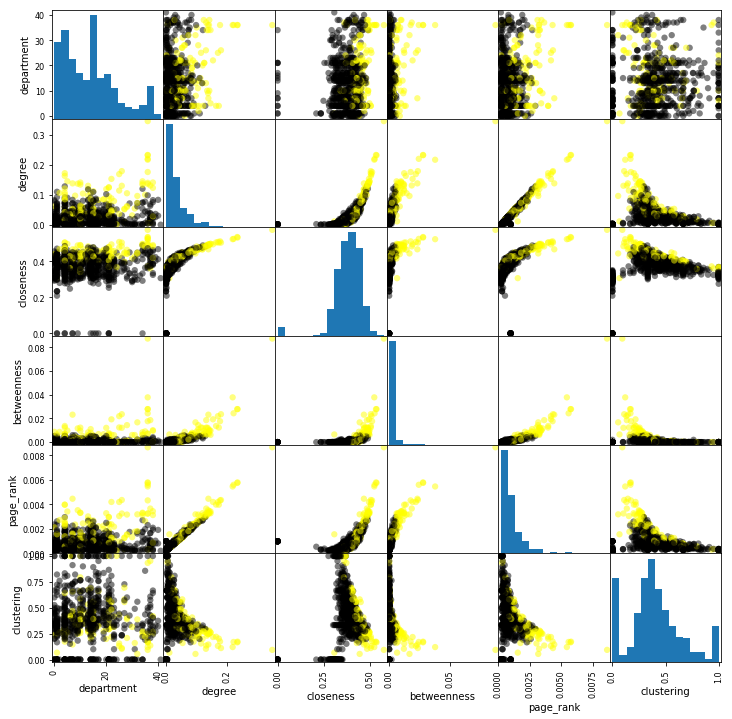

In [10]:
from matplotlib import cm
%matplotlib inline
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15},
                                     figsize=(12,12), cmap=cmap)

We can drop the features that are not giving information about the target value:

In [11]:
X = X.drop(columns = ['department','clustering'])
X_predict = X_predict.drop(columns = ['department','clustering'])

## 5. TRAINING AND TESTING DIFFERENT ESTIMATORS

In this section, we will train different estimators. In order to see how the performance of the classifiers increase when we adjust each  model specifically we are going to follow the next steps and compute the score after each one:

1. Test the classifier with the default parameters.
2. Preprocess the data if the classifier needed it.
3. Tune the parameters.

To test the classifiers we will use the **ROC_AUC** score that can be interpreted as the probability that the classifier will assign a higher score to a randomly chosen positive example than to a randomly chosen negative example.



In [12]:
# initializing a list to store the scores of the different classifiers
l_score =[]

### KNeighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)


# Default parameters
knn = KNeighborsClassifier()
score_knn = cross_val_score(knn, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_knn))

# With preprocessing
knn_2 = KNeighborsClassifier()
knn_2_pipe = make_pipeline(StandardScaler(), knn_2)
score_knn_2 = cross_val_score(knn_2_pipe, X, y, cv = 10, scoring= 'roc_auc').mean()
print('With preprocessing, ROC_AUC score: {}'.format(score_knn_2))

# Tuning parameters (with preprocessing)
knn_3 = KNeighborsClassifier()
pipe = Pipeline([('scale',StandardScaler()),('clf',knn_3)])
k_range = range(1,51)
weight_options = ['uniform','distance']
param_grid = dict(clf__n_neighbors = k_range, clf__weights = weight_options)
grid_1 = GridSearchCV(pipe, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_1.fit(X,y)
l_score.append(grid_1.best_score_)
print('Tuning parameters (with preprocessing), ROC_AUC score: {}'.format(grid_1.best_score_))
print('Best parameters {}'.format(grid_1.best_params_))


Default parameters, ROC_AUC score: 0.829642781986532
With preprocessing, ROC_AUC score: 0.8560818377224628
Tuning parameters (with preprocessing), ROC_AUC score: 0.9331720586389413
Best parameters {'clf__weights': 'uniform', 'clf__n_neighbors': 47}


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

# Default parameters
logreg = LogisticRegression() 
score_logreg = cross_val_score(logreg, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_logreg))

# With preprocessing
logreg_2 = LogisticRegression()
logreg_2_pipe = make_pipeline(StandardScaler(), logreg_2)
score_logreg_2 = cross_val_score(logreg_2_pipe, X, y, cv = 10, scoring= 'roc_auc').mean()
print('With preprocessing, ROC_AUC score: {}'.format(score_logreg_2))

# Tuning parameters (with preprocessing)
logreg_3 = LogisticRegression()
pipe = Pipeline([('scale',StandardScaler()),('clf',logreg_3)])
C_range = [0.01, 0.1, 1, 10]
param_grid = dict(clf__C = C_range, )
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid.fit(X,y)
print('Tuning parameters (with preprocessing), ROC_AUC score: {}'.format(grid.best_score_))
print('Best parameter {}'.format(grid.best_params_))


# Tuning parameters (without preprocessing)
logreg_4 = LogisticRegression()
C_range = [0.01, 0.1, 1, 10]
param_grid = dict(C = C_range, )
grid_2 = GridSearchCV(logreg_4, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_2.fit(X,y)
l_score.append(grid_2.best_score_)
print('Tuning parameters (without preprocessing), ROC_AUC score: {}'.format(grid_2.best_score_))
print('Best parameter {}'.format(grid_2.best_params_))



Default parameters, ROC_AUC score: 0.923297897126022
With preprocessing, ROC_AUC score: 0.9183494167869167
Tuning parameters (with preprocessing), ROC_AUC score: 0.9181598521737965
Best parameter {'clf__C': 1}
Tuning parameters (without preprocessing), ROC_AUC score: 0.9236332388100317
Best parameter {'C': 10}


### Linear Support Vector Classification

In [15]:
from sklearn.svm import LinearSVC

# Default parameters
lsvc = LinearSVC() 
score_lsvc = cross_val_score(lsvc, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_lsvc))

# With preprocessing
lsvc_2 = LinearSVC()
lsvc_2_pipe = make_pipeline(StandardScaler(), lsvc_2)
score_lsvc_2 = cross_val_score(lsvc_2_pipe, X, y, cv = 10, scoring= 'roc_auc').mean()
print('With preprocessing, ROC_AUC score: {}'.format(score_lsvc_2))

# Tuning parameters (without preprocessing)
lsvc_3 = LinearSVC()
C_range = [0.01, 0.1, 1, 10]
param_grid = dict(C = C_range, )
grid_3 = GridSearchCV(lsvc_3, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_3.fit(X,y)
l_score.append(grid_3.best_score_)
print('Tuning parameters (without preprocessing), ROC_AUC score: {}'.format(grid_3.best_score_))
print('Best parameter {}'.format(grid_3.best_params_))


Default parameters, ROC_AUC score: 0.9218889039201539
With preprocessing, ROC_AUC score: 0.9083553165584416
Tuning parameters (without preprocessing), ROC_AUC score: 0.9226824663826656
Best parameter {'C': 0.1}


### Support Vector Classification

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


# Default parameters
svcc = SVC()
score_svcc = cross_val_score(svcc, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_svcc))

# With preprocessing
svcc_2 = SVC()
svcc_2_pipe = make_pipeline(MinMaxScaler(), svcc_2)
score_svcc_2 = cross_val_score(svcc_2_pipe, X, y, cv = 10, scoring= 'roc_auc').mean()
print('With preprocessing, ROC_AUC score: {}'.format(score_svcc_2))

# Tuning parameters (without preprocessing)
svcc_3 = SVC()
C_range = [0.01, 0.1, 1, 10]
param_grid = dict(C = C_range, )
grid_4 = GridSearchCV(svcc_3, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_4.fit(X,y)
l_score.append(grid_4.best_score_)
print('Tuning parameters (without preprocessing), ROC_AUC score: {}'.format(grid_4.best_score_))
print('Best parameter {}'.format(grid_4.best_params_))



Default parameters, ROC_AUC score: 0.9190634018759019
With preprocessing, ROC_AUC score: 0.9018116432178932
Tuning parameters (without preprocessing), ROC_AUC score: 0.9191570658204125
Best parameter {'C': 0.01}


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Default parameters
rfc = RandomForestClassifier()
score_rfc = cross_val_score(rfc, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_rfc))

# Tuning parameters (without preprocessing)
rfc_2 = RandomForestClassifier()
n_range = range(10,101,10)
param_grid = dict(n_estimators = n_range)
grid_5 = GridSearchCV(rfc_2, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_5.fit(X,y)
l_score.append(grid_5.best_score_)
print('Tuning parameters (without preprocessing), ROC_AUC score: {}'.format(grid_5.best_score_))
print('Best parameter {}'.format(grid_5.best_params_))



Default parameters, ROC_AUC score: 0.8808301579785954
Tuning parameters (without preprocessing), ROC_AUC score: 0.9101009681811475
Best parameter {'n_estimators': 70}


### Gradient Boosted Decision Trees

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Default parameters
gbc = GradientBoostingClassifier()
score_gbc = cross_val_score(gbc, X, y, cv = 10, scoring= 'roc_auc').mean()
print('Default parameters, ROC_AUC score: {}'.format(score_rfc))

# Tuning parameters (without preprocessing)
gbc_2 = RandomForestClassifier()
n_range = range(10,101,10)
param_grid = dict(n_estimators = n_range)
grid_6 = GridSearchCV(gbc_2, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_6.fit(X,y)
l_score.append(grid_6.best_score_)
print('Tuning parameters (without preprocessing), ROC_AUC score: {}'.format(grid_6.best_score_))
print('Best parameter {}'.format(grid_6.best_params_))

Default parameters, ROC_AUC score: 0.8808301579785954
Tuning parameters (without preprocessing), ROC_AUC score: 0.9145100095050297
Best parameter {'n_estimators': 90}


## 6. CHOOSING THE BEST ESTIMATOR

We have tested all the classifiers and we know the score for each of them. Clearly, the best performance has been obtained tuning the parameters with a GridSearchCV. Now for each classifier, we are going to compute the execution time to add it as a new criterion when choosing the best estimator.

In [19]:
import time

grids = [grid_1, grid_2, grid_3, grid_4, grid_5, grid_6]
l_time = []
for estimator in grids:
    est_t = []
    for rep in range(10): # we do 10 simulations for each estimator
        start = time.time()
        estimator.predict(X_predict) 
        end = time.time()
        est_t.append(end-start)  
    l_time.append(np.asarray(est_t).mean())

We store the scores and execution times in a data frame:

In [20]:
l_estim = ['KNeighbours','Logit', 'LSVC','SVC','Random Forest','GB']
df_est = pd.DataFrame({'Estimator': l_estim, 'Score': l_score, 'Execution time [s]': l_time})
df_est

,Estimator,Execution time [s],Score
0,KNeighbours,0.003375,0.933172
1,Logit,0.000360,0.923633
2,LSVC,0.000420,0.922682
3,SVC,0.001293,0.919157
4,Random Forest,0.006255,0.910101
5,GB,0.007215,0.914510


To see graphically the performance of each classifier, we will do a scatter plot. In the x-axis we have the score and in the y-axis we have the execution time:

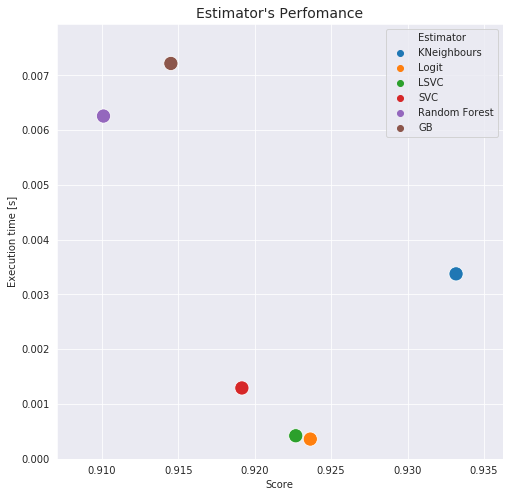

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
g = sns.scatterplot(data = df_est, y = 'Execution time [s]', x = 'Score', s = 200, hue = 'Estimator')
plt.ylim(0, df_est['Execution time [s]'].max() *1.1)
plt.title("Estimator's Perfomance", fontsize = 14)
plt.show()

From the scatter plot we can see how the highest score is got from the KNeighbours Classifier and the lowest from the Random Forest. In terms of execution time, we can differentiate two groups, the one composed by the the Gradient Boosted Decision Trees and the Random Forest and the other composed by the SVC, the LSVC and the Logistic Regression, this last group is much faster converging to the solution. Between both groups is the KNeighbours classifier.

## 7. CONCLUSION

Under the assumption that for our task the time is not a limiting resource, we choose as the best classifier the **KNeighbours Classifier**. We have achieved to create an algorithm that predicts if a employee has a management job postion in a company from the email network of that company.

Finally, we proceed to compute the probabilities of the classifier giving a positive value to the target. With this information we can set a threshold to increase the sensitivity of our classifier and be more confident with the final conclusion. We set the threshold in the 80%:

In [22]:
X_predict['Probability'] = grid_1.predict_proba(X_predict)[:,1]
prob = X_predict.index[X_predict['Probability'] > 0.8].tolist()
print('Employees {} are receiving a management position salary with a higher probability of 80%.'.
      format(prob))

Employees [5, 62, 65, 142, 249, 283, 420, 434, 533, 820] are receiving a management position salary with a higher probability of 80%.
